# **Data Preparing and processing**

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_lables = []
train_samples = []

Example data
- An experiemental drug was tested on individuals from ages 13 to 100 in a linical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- 95% of patients 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effets.

In [ ]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_lables.append(1) # 5% young - side effects

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(0) # 5% old - no side effects

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_lables.append(0) # 95% young - no side effects

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_lables.append(1) # 95% old - side effects



In [ ]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)
train_lables, train_samples = shuffle(train_lables,train_samples)


In [ ]:

train_lables.shape

(2100,)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

# **Simple tf.keras sequential model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(units=16,input_shape=(1,),activation='relu'),
                    Dense(units=32,activation='relu'),
                    Dense(units=2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.fit(x=scaled_train_samples,y=train_lables,batch_size=10,epochs=30,shuffle=True,verbose=2)

# Validation

In [ ]:
model.fit(x=scaled_train_samples,y=train_lables,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6505 - accuracy: 0.5423 - val_loss: 0.6189 - val_accuracy: 0.6476 - 873ms/epoch - 5ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6298 - accuracy: 0.5979 - val_loss: 0.5940 - val_accuracy: 0.7000 - 273ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6028 - accuracy: 0.6825 - val_loss: 0.5563 - val_accuracy: 0.8048 - 278ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5674 - accuracy: 0.7587 - val_loss: 0.5237 - val_accuracy: 0.8333 - 320ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5385 - accuracy: 0.7963 - val_loss: 0.4936 - val_accuracy: 0.8524 - 342ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5086 - accuracy: 0.8185 - val_loss: 0.4621 - val_accuracy: 0.8714 - 350ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4736 - accuracy: 0.8492 - val_loss: 0.4291 - val_accuracy: 0.8952 - 387ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4427 - accuracy: 0.8677 - val_loss: 0.4025 - val_accuracy: 0.9000 - 298ms/epoch - 2ms/step


In [ ]:
test_lables = []
test_samples = []

In [ ]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_lables.append(1) # 5% young - side effects

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_lables.append(0) # 5% old - no side effects

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_lables.append(0) # 95% young - no side effects

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_lables.append(1) # 95% old - side effects

In [ ]:
test_lables = np.array(test_lables)
test_samples = np.array(test_samples)
test_lables, test_samples = shuffle(test_lables,test_samples)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# **Predictions**

In [ ]:
predictions = model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

array([0.82758621])

In [ ]:
print(predictions[1],scaled_test_samples[1])

[0.06390894 0.93609107] [0.82758621]


In [ ]:
rounded_predictions = np.argmax(predictions,axis=-1)

# **Confusion matrix**

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm = confusion_matrix(y_true=test_lables,y_pred=rounded_predictions)

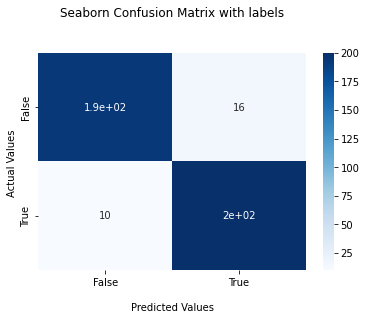

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# **Save and load**

In [ ]:
import os.path
if os.path.isfile('models/medical_train_model.h5') is False:
  model.save('models/medical_train_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model('models/medical_train_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
